**Loading the data**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam (1).csv


In [2]:
import pandas as pd

# this is to load the dataset
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data inspection

---
The dataset consist of 5 columns and 5572 rows. First colum V1 Contains  the labels , secoun colum V2 Contains the text of the SMS messages. the other colums are mostly empty and irrelevant. In the column V1 there are ham: 4825 messages and spam: 747 messages, this means the dataset is imbalanced.


In [3]:
# this is to check basic info and to display the columns names in my dataset
data.info()

print("\nColumn Names:\n", data.columns)

# here i check for missing values and see the class distribution
print("\nMissing Values:\n", data.isnull().sum())

print("\nClass Distribution:\n", data['v1'].value_counts())

# Here i display basic statistics
print("\nBasic Statistics:\n", data.describe())

# first 5 rows
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB

Column Names:
 Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Missing Values:
 v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Class Distribution:
 v1
ham     4825
spam     747
Name: count, dtype: int64

Basic Statistics:
           v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Droping unnecessary columns**


In [4]:
# Here i rename important columns and drop unnecessary ones
data = data.rename(columns={'v1': 'label', 'v2': 'message'})
data = data[['label', 'message']]

# show  the first few rows to confirm that the columns have new names now
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**convert the labels into numerical values**

In [5]:
# change the labels to numerical values
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# show the first few rows
data.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Detecting and removeing duplicates in the message column**

---

This shows that 403 dublicated messages have been deleted

In [6]:
# find out if the is duplicated messages
print(f"Number of duplicate messages: {data.duplicated(subset=['message']).sum()}")

# here i remov duplicated messages
data = data.drop_duplicates(subset=['message'])

# show how the the new shape of the dataset looks like now
print(f"New dataset size after removing duplicates: {data.shape}")


Number of duplicate messages: 403
New dataset size after removing duplicates: (5169, 2)


 **Spam vs. Ham Distribution bar plot**

---
This plot shows the the data is imbalanced . Most of the messages are Ham. This reflects real-world communication patterns where spam is relatively less frequent compared to regular messages

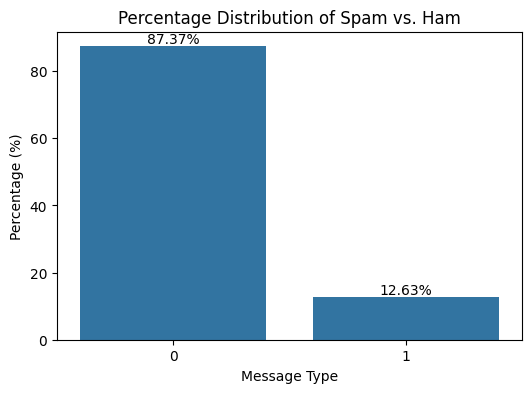

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#  percentage
class_distribution = data['label'].value_counts(normalize=True) * 100

# Plotin
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Percentage Distribution of Spam vs. Ham')
plt.xlabel('Message Type')
plt.ylabel('Percentage (%)')

for index, value in enumerate(class_distribution.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

plt.show()


**Message Length Distribution for both Spam and Ham**

---
This shows that spam messages tend to be longer on average compared to ham messages. Ham messages are concentrated around shorter lengths (between 0 and 100 characters), while Spam messages are between 100 and 200. Some ham messages extend beyond 400 characters and spam messages have also outliers.


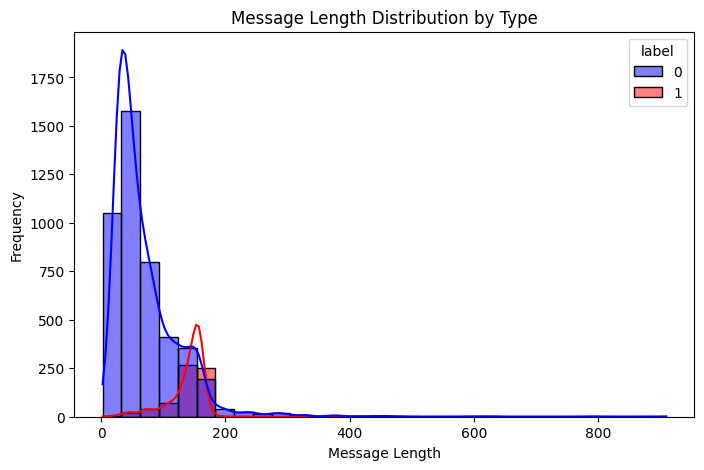

In [8]:
# here i make new column for message length
data['message_length'] = data['message'].apply(len)

# this is to plot the distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='message_length', hue='label', bins=30, kde=True, palette=['blue', 'red'])
plt.title('Message Length Distribution by Type')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


**cleaning the text before doing the Word Frequency Analysis**

In [9]:
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# this is to define from wich languag e the stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation
def clean_text(message):

    message = message.lower() # this is to make the text in lowercase
    message = ''.join(char for char in message if char not in punctuations)
    # ths to remove stop words
    message = ' '.join(word for word in message.split() if word not in stop_words)
    return message


data['clean_message'] = data['message'].apply(clean_text)

# show the first few cleaned messages
data[['message', 'clean_message']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


**Word Frequency Analysis**

---

Her we can see that words like (call, free, txt)are very prominen in spam messages. While the common worlds in ham messages are like (u, im, get) are more conversational and personal words . Spam worlds are  about action and promotions, but ham worlds are about everyday conversation.

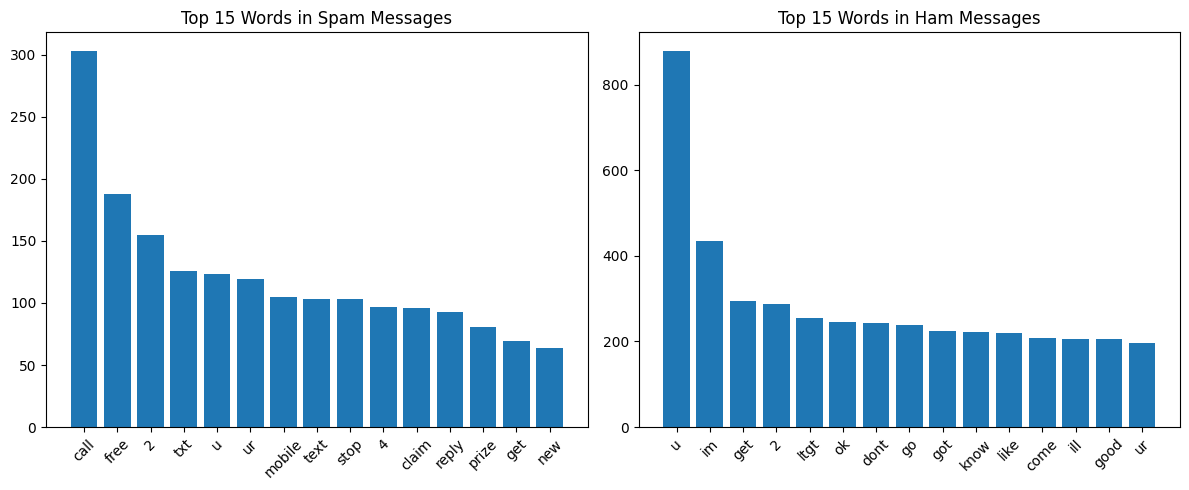

In [10]:

from collections import Counter

# Separate between spam and ham messages
spam_words = ' '.join(data[data['label'] == 1]['clean_message']).split()
ham_words = ' '.join(data[data['label'] == 0]['clean_message']).split()

#  most common words
spam_counter = Counter(spam_words)
ham_counter = Counter(ham_words)

# Plot the top 15 words for each category
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(*zip(*spam_counter.most_common(15)))
plt.title('Top 15 Words in Spam Messages')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(*zip(*ham_counter.most_common(15)))
plt.title('Top 15 Words in Ham Messages')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Term Frequency - Inverse Document Frequency**

---
This code create TF-IDF vector for each message.Limit the features to the top 1000 words based on importance. And store it in a matrix that can be used for training models. The TF-IDF Matrix Shape: (5169, 1000) which means 5169 rows (the number of the messages in the dataset) and 1000 columns total number of features (words) that were selected from the text.


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Firs i initialize vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# then i transform the cleaned messages
X = vectorizer.fit_transform(data['clean_message'])

# and the i show the feature matrix
print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (5169, 1000)


In [14]:
!pip install numpy==1.26.4
!pip install gensim --force-reinstall


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

**Word2Vec model and generate sentence embeddings for each message**

---
we have 5169 messages and each message is represented as a 100-dimensional vector


In [12]:
from gensim.models import Word2Vec
import numpy as np

# this is to prepare the data for Word2Vec
sentences = [message.split() for message in data['clean_message']]

# here the Word2Vec model trians
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to create a sentence embedding
def get_sentence_vector(sentence):
    words = sentence.split()
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(100)
    else:
        return np.mean(word_vectors, axis=0)

# this line is to generat sentence embeddings for each message
X_w2v = np.array([get_sentence_vector(message) for message in data['clean_message']])

# show the shape of the new feature matrix
print("Word2Vec Matrix Shape:", X_w2v.shape)


Word2Vec Matrix Shape: (5169, 100)


**combined and optimized code for training Logistic Regression on both TF-IDF and Word2Vec features with evaluation metrics**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm
import time

# the target variable
y = data['label']

# Split the data 80% training, and  20% for testing
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v, _, _ = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# this line initialize the models
models = {
    "TF-IDF": LogisticRegression(max_iter=1000),
    "Word2Vec": LogisticRegression(max_iter=1000)
}

# training and evaluation
for name, model in models.items():
    print(f"\n=== Training Logistic Regression with {name} ===")


    # this is to show progress bar
    for _ in tqdm(range(1), desc=f"Training {name}"):
        model.fit(X_train_tfidf if name == "TF-IDF" else X_train_w2v, y_train)


    # here the mmodel makes predictions
    y_pred = model.predict(X_test_tfidf if name == "TF-IDF" else X_test_w2v)

    # accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== Evaluation Report for {name} ===")
    print(f"Accuracy: {acc:.4f}")

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    for label in ['0', '1']:
        print(f"\nLabel {label}:")
        print(f"  Precision: {report[label]['precision']:.2f}")
        print(f"  Recall:    {report[label]['recall']:.2f}")
        print(f"  F1-Score:  {report[label]['f1-score']:.2f}")
        print(f"  Support:   {report[label]['support']}")


=== Training Logistic Regression with TF-IDF ===


Training TF-IDF: 100%|██████████| 1/1 [00:00<00:00, 59.01it/s]



=== Evaluation Report for TF-IDF ===
Accuracy: 0.9652

Label 0:
  Precision: 0.97
  Recall:    0.99
  F1-Score:  0.98
  Support:   889.0

Label 1:
  Precision: 0.94
  Recall:    0.81
  F1-Score:  0.87
  Support:   145.0

=== Training Logistic Regression with Word2Vec ===


Training Word2Vec: 100%|██████████| 1/1 [00:00<00:00, 86.70it/s]


=== Evaluation Report for Word2Vec ===
Accuracy: 0.8598

Label 0:
  Precision: 0.86
  Recall:    1.00
  F1-Score:  0.92
  Support:   889.0

Label 1:
  Precision: 0.00
  Recall:    0.00
  F1-Score:  0.00
  Support:   145.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**combined and optimized code for training SVM (Support Vector Machine) on both TF-IDF and Word2Vec features with evaluation metrics and progress bar**



In [16]:

from sklearn.svm import SVC

# I nitialize the models here
models = {
    "TF-IDF": SVC(),
    "Word2Vec": SVC()
}

# training and evaluation
for name, model in models.items():
    print(f"\n=== Training SVM with {name} ===")


    # show the progress bar
    for _ in tqdm(range(1), desc=f"Training {name}"):
        model.fit(X_train_tfidf if name == "TF-IDF" else X_train_w2v, y_train)

    y_pred = model.predict(X_test_tfidf if name == "TF-IDF" else X_test_w2v)

    # accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== Evaluation Report for {name} ===")
    print(f"Accuracy: {acc:.4f}")

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    for label in ['0', '1']:
        print(f"\nLabel {label}:")
        print(f"  Precision: {report[label]['precision']:.2f}")
        print(f"  Recall:    {report[label]['recall']:.2f}")
        print(f"  F1-Score:  {report[label]['f1-score']:.2f}")
        print(f"  Support:   {report[label]['support']}")



=== Training SVM with TF-IDF ===


Training TF-IDF: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]



=== Evaluation Report for TF-IDF ===
Accuracy: 0.9778

Label 0:
  Precision: 0.98
  Recall:    1.00
  F1-Score:  0.99
  Support:   889.0

Label 1:
  Precision: 0.98
  Recall:    0.86
  F1-Score:  0.92
  Support:   145.0

=== Training SVM with Word2Vec ===


Training Word2Vec: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


=== Evaluation Report for Word2Vec ===
Accuracy: 0.8598

Label 0:
  Precision: 0.86
  Recall:    1.00
  F1-Score:  0.92
  Support:   889.0

Label 1:
  Precision: 0.00
  Recall:    0.00
  F1-Score:  0.00
  Support:   145.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**combined and optimized code for training Naive Bayes  MultinomialNB for TF-IDF and GaussianNB for Word2Vec with evaluation metrics and progress bar**

In [17]:

from sklearn.naive_bayes import MultinomialNB, GaussianNB
# the same code again but with Naive Bayes models
models = {
    "TF-IDF": MultinomialNB(),
    "Word2Vec": GaussianNB()
}


for name, model in models.items():
    print(f"\n=== Training Naive Bayes with {name} ===")


    # progress bar
    for _ in tqdm(range(1), desc=f"Training {name}"):
        if name == "TF-IDF":
            model.fit(X_train_tfidf, y_train)
        else:
            model.fit(X_train_w2v, y_train)



    #  predictions
    y_pred = model.predict(X_test_tfidf if name == "TF-IDF" else X_test_w2v)

    # accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== Evaluation Report for {name} ===")
    print(f"Accuracy: {acc:.4f}")

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    for label in ['0', '1']:
        print(f"\nLabel {label}:")
        print(f"  Precision: {report[label]['precision']:.2f}")
        print(f"  Recall:    {report[label]['recall']:.2f}")
        print(f"  F1-Score:  {report[label]['f1-score']:.2f}")
        print(f"  Support:   {report[label]['support']}")


=== Training Naive Bayes with TF-IDF ===


Training TF-IDF: 100%|██████████| 1/1 [00:00<00:00, 306.42it/s]



=== Evaluation Report for TF-IDF ===
Accuracy: 0.9700

Label 0:
  Precision: 0.97
  Recall:    1.00
  F1-Score:  0.98
  Support:   889.0

Label 1:
  Precision: 0.97
  Recall:    0.81
  F1-Score:  0.88
  Support:   145.0

=== Training Naive Bayes with Word2Vec ===


Training Word2Vec: 100%|██████████| 1/1 [00:00<00:00, 114.35it/s]


=== Evaluation Report for Word2Vec ===
Accuracy: 0.4961

Label 0:
  Precision: 0.94
  Recall:    0.44
  F1-Score:  0.60
  Support:   889.0

Label 1:
  Precision: 0.19
  Recall:    0.82
  F1-Score:  0.31
  Support:   145.0


**Save the Models and Vectorizer**

In [ ]:
import joblib

# Save only the TF-IDF model and vectorizer
joblib.dump(models["TF-IDF"], 'logistic_regression_tfidf_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print(" Logistic Regression (TF-IDF) and vectorizer have been saved successfully!")
from google.colab import files

# Download the model
files.download('logistic_regression_tfidf_model.pkl')
files.download('tfidf_vectorizer.pkl')



 Logistic Regression (TF-IDF) and vectorizer have been saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Save only the SVM TF-IDF model and vectorizer
joblib.dump(models["TF-IDF"], 'svm_tfidf_model.pkl')

print(" SVM (TF-IDF) saved successfully!")

# Download the model
files.download('svm_tfidf_model.pkl')



 SVM (TF-IDF) saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save only the Naive Bayes TF-IDF model and vectorizer
joblib.dump(models["TF-IDF"], 'multinomialnb_tfidf_model.pkl')

print(" Naive Bayes (TF-IDF) saved successfully!")

# Download the model
files.download('multinomialnb_tfidf_model.pkl')



 Naive Bayes (TF-IDF) saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>